In [14]:
# Allows matplotlib figures inline
%matplotlib inline
# Our standard network analysis module. Please use as nx so I may read code more easily.
import networkx as nx
# Our standard ploting module. Again, please use as plt.
import matplotlib.pyplot as plt

In [15]:
# Can be used to make the printing of certain objects (especially dictionaries and tuples) easier for humans.
import pprint
# Just a lazy way of supressing warnings
import warnings
warnings.filterwarnings('ignore')

In [60]:
import pandas as pd
import numpy as np

In [17]:
Graph = nx.read_edgelist('ntw.txt')

----

In [38]:
Graph_infos = {}

## degree centrality

In [19]:
deg_cen = dict(nx.degree_centrality(Graph))


In [39]:
Graph_infos['Degree Centrality'] = deg_cen

##  closeness centrality

In [20]:
clo_cen = nx.closeness_centrality(Graph)


In [40]:
Graph_infos['Closeness Centrality'] = clo_cen

##  betweenness centrality

In [22]:
bw_cen = nx.betweenness_centrality(Graph)


TypeError: 'Graph' object does not support item assignment

In [41]:
Graph_infos['Betweeness Centrality'] = bw_cen

## PageRank

In [13]:
#pr_cen = nx.pagerank(Graph)
#Graph_infos['Pagerank Centrality'] = pr_cen

NameError: name 'pr_cen_nonFree' is not defined

## Eigenvectors

In [24]:
eig_cen = nx.eigenvector_centrality(Graph)


In [42]:
Graph_infos['Eigenvector Centrality'] = eig_cen

### 1.2

In [25]:
import operator

In [26]:
#list to dict function
def list_to_dict(a):
    d = dict() 
    for j in range(len(a)):
        key = a[j][0]
        value = a[j][1]
        d[key] = value
    return d

In [30]:
# print top 10 nodes for given centrality measure
def top_print(name,centrality,n):
    if centrality == None:
        return None
    ranked_list = sorted(centrality.items(),key = operator.itemgetter(1),reverse = True)
    ranked_dict = list_to_dict(ranked_list)
    print(' ')
    print("CENTRALITY MEASURE BY {}".format(name.upper()))
    for k in range(0,n):
        # depends for decimals or not
        if ranked_list[k][1] > 1:
            print("{}. {} has a centrality of {:.0F}".format(k+1,ranked_list[k][0],ranked_list[k][1]))
        else:
            print("{}. {} has a centrality of {:.5F}".format(k+1,ranked_list[k][0],ranked_list[k][1]))
        k = k+1

In [31]:
#execute function
for k in Graph_infos:
    centrality = Graph_infos[k]
    name = k
    top_print(name,centrality,10)

 
CENTRALITY MEASURE BY CLOSE CENTRALITY
1. 107 has a centrality of 0.45970
2. 58 has a centrality of 0.39740
3. 428 has a centrality of 0.39484
4. 563 has a centrality of 0.39391
5. 1684 has a centrality of 0.39361
6. 171 has a centrality of 0.37049
7. 348 has a centrality of 0.36992
8. 483 has a centrality of 0.36985
9. 414 has a centrality of 0.36954
10. 376 has a centrality of 0.36656
 
CENTRALITY MEASURE BY EIGENVECTOR
1. 1912 has a centrality of 0.09541
2. 2266 has a centrality of 0.08698
3. 2206 has a centrality of 0.08605
4. 2233 has a centrality of 0.08517
5. 2464 has a centrality of 0.08428
6. 2142 has a centrality of 0.08419
7. 2218 has a centrality of 0.08416
8. 2078 has a centrality of 0.08414
9. 2123 has a centrality of 0.08367
10. 1993 has a centrality of 0.08353
 
CENTRALITY MEASURE BY DEGREE CENTRALITY
1. 107 has a centrality of 0.25879
2. 1684 has a centrality of 0.19614
3. 1912 has a centrality of 0.18697
4. 3437 has a centrality of 0.13546
5. 0 has a centrality of 0

In [106]:
def overall_ranking(G, G_infos, n_top):
    centralities = list(G_infos.keys())
    centrality_ranked = {}
    overall_rank = {n: [] for n in G.nodes}

    for cen in centralities:

        ranking = sorted(G_infos[cen].items(),key = operator.itemgetter(1),reverse = True)
        
        centrality_ranked[cen] = {ranking[n][0]: n+1 for n in range(0,len(ranking))}
        
        for node in G.nodes:
            overall_rank[node].append(centrality_ranked[cen][node])
        
    total = {node: np.sum(overall_rank[node]) for node in G.nodes}
    
    total_ranking = sorted(total.items(),key = operator.itemgetter(1),reverse = False)
    
    top_nodes = [total_ranking[i][0] for i in range(n_top)]
    
    print('OVERALL RANKING')

        
    for i in range(len(top_nodes)):
        node = top_nodes[i]
        print('')
        print('------------------')
        print('Node: {}'.format(node))
        print('')
        print('No: {} in overall ranking'.format(i+1))
        print('')
        for j in range(len(centralities)):
            print('No: {} in {} ranking'.format(overall_rank[node][j], str(centralities[j])))
        
       

In [107]:
overall_ranking(Graph, Graph_infos,10)

OVERALL RANKING

------------------
Node: 1912

No: 1 in overall ranking

No: 3 in degree Centrality ranking
No: 28 in close centrality ranking
No: 4 in bw centrality ranking
No: 1 in eigenvector ranking

------------------
Node: 1577

No: 2 in overall ranking

No: 140 in degree Centrality ranking
No: 22 in close centrality ranking
No: 14 in bw centrality ranking
No: 246 in eigenvector ranking

------------------
Node: 1718

No: 3 in overall ranking

No: 194 in degree Centrality ranking
No: 23 in close centrality ranking
No: 16 in bw centrality ranking
No: 338 in eigenvector ranking

------------------
Node: 1465

No: 4 in overall ranking

No: 426 in degree Centrality ranking
No: 26 in close centrality ranking
No: 21 in bw centrality ranking
No: 273 in eigenvector ranking

------------------
Node: 107

No: 5 in overall ranking

No: 1 in degree Centrality ranking
No: 1 in close centrality ranking
No: 1 in bw centrality ranking
No: 757 in eigenvector ranking

------------------
Node: 166

In [32]:
# histogram function
def nx_hist(x, bins, normed = False, yscale = 'linear', title = None, xlabel = 'Degree', ylabel = 'Count'): 
    density = None
    if(normed):
        density = 1
        ylabel = 'Probability'
    plt.hist(x, bins=bins, normed=density)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.yscale(yscale)
    plt.title(title)
    plt.grid(True)
    plt.show()

In [51]:

def draw_graph_top(G,degree_dict,n, layout, name):
    
    plt.figure(figsize=(15,15))
    nx.draw_networkx(G, pos = layout, node_size = 30, with_labels = False,  edge_color = '0.7')
    # add bigger nodes in color
    nx.draw_networkx_nodes(G,pos=layout,nodelist=list(degree_dict)[:n], with_labels = True, node_color='y')
    # add their names
    labels = {i: i for i in list(degree_dict)[:n]}
    nx.draw_networkx_labels(G,layout, labels,font_size=12, font_color = 'b')
    plt.title(name, fontsize = 20)
    plt.axis("off")

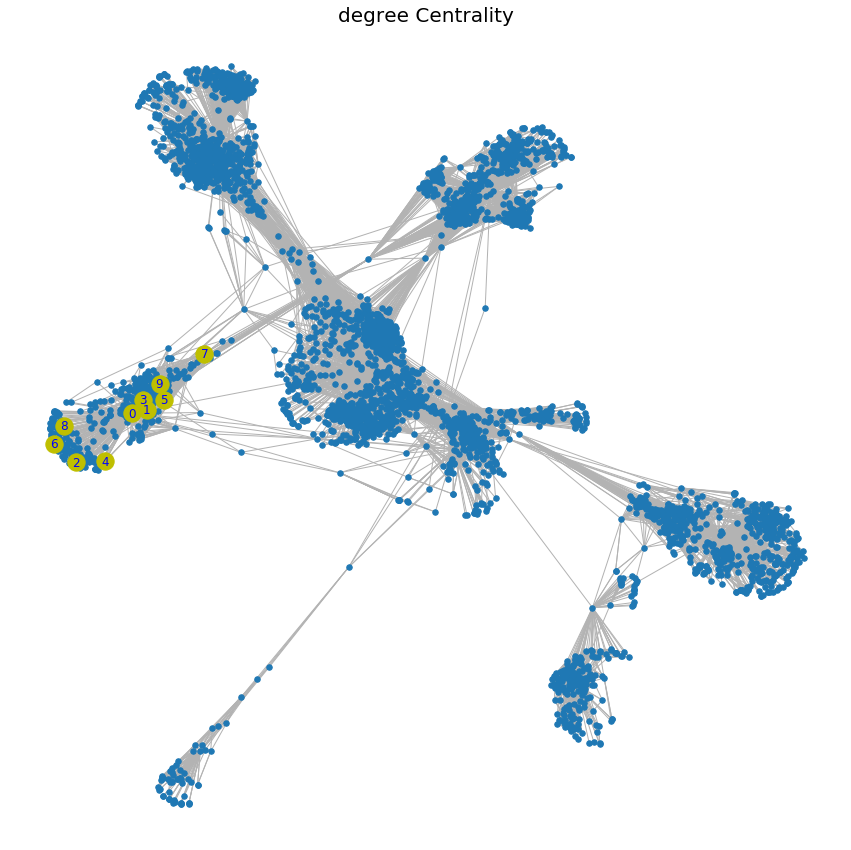

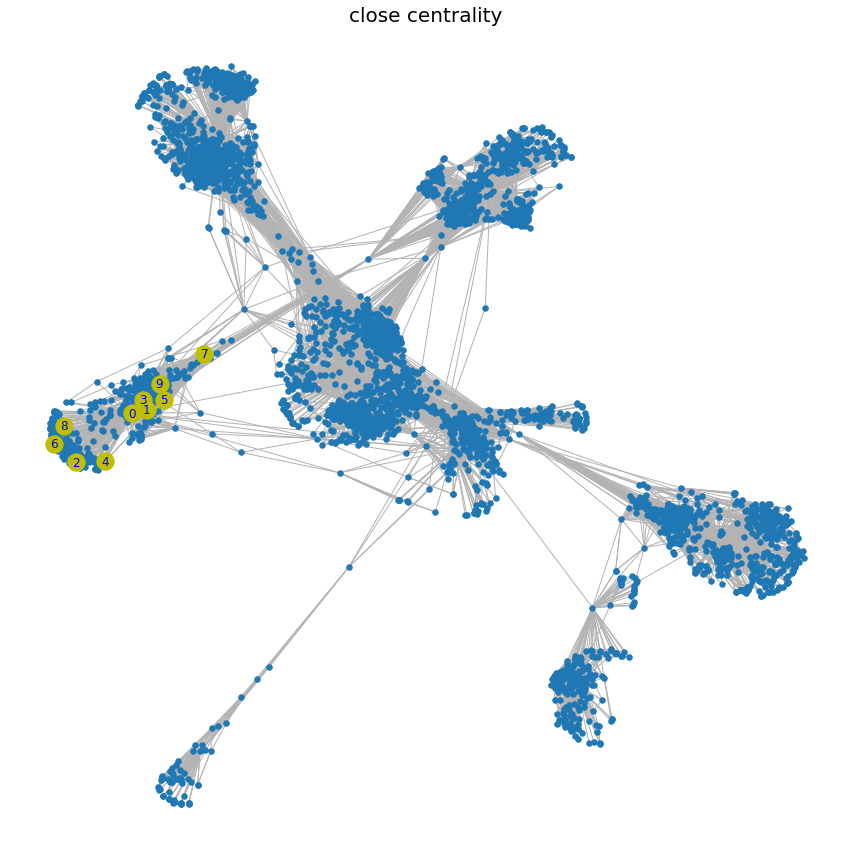

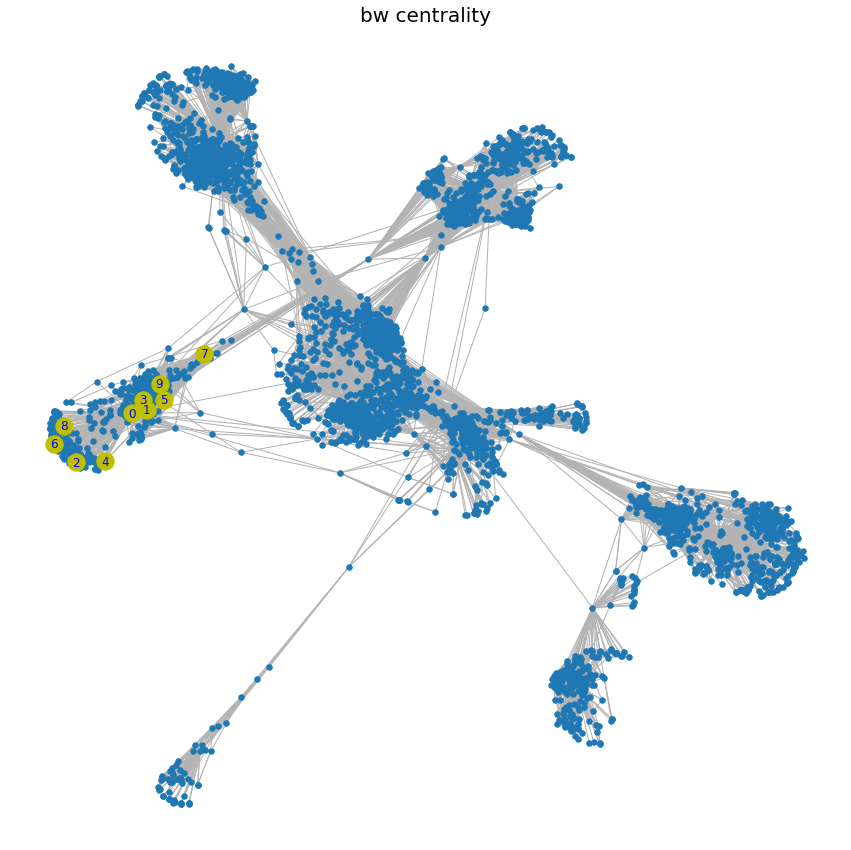

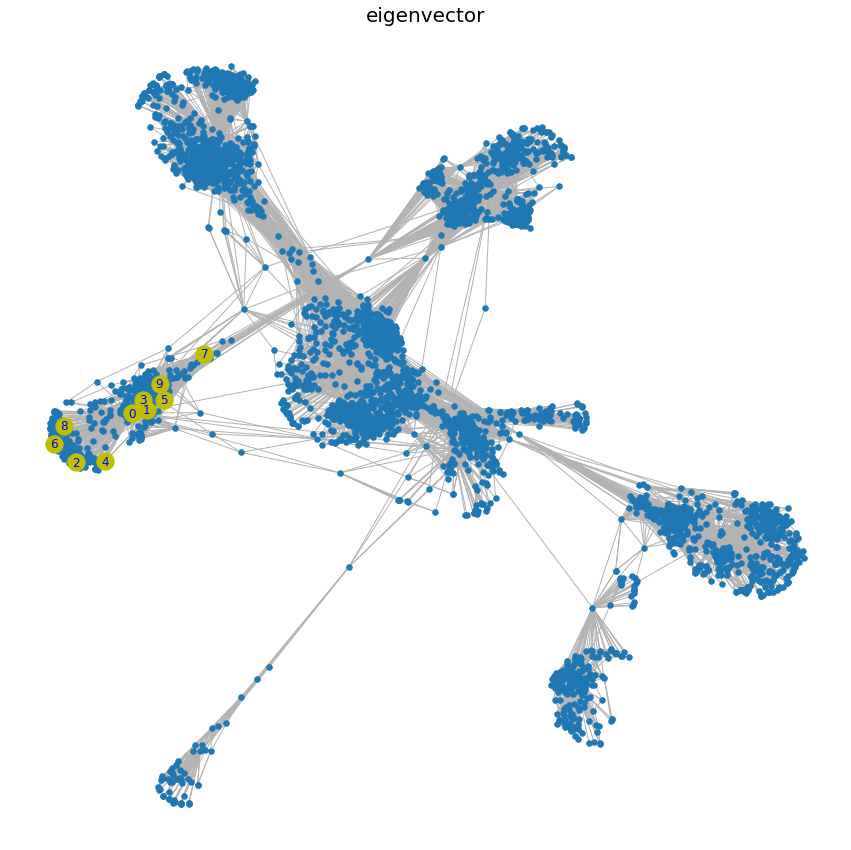

In [52]:
layout = nx.spring_layout(Graph)
for cen in Graph_infos.keys():
    draw_graph_top(Graph,Graph_infos[cen],10, layout, str(cen))